# SERVIR - WEST AFRICA TRAINING

## Module 1: My First EF5 model

### Step 1: Creathe the basic EF5 Files.

1. Hydrosheds files at 1km resolution can be downloaded from the following links (click on it), or using wget retriever.

FLOW DIRECTION: https://data.hydrosheds.org/file/hydrosheds-v1-dir/hyd_af_dir_30s.zip

FLOW ACCUMULATION: https://data.hydrosheds.org/file/hydrosheds-v1-acc/hyd_af_acc_30s.zip

DEM: https://data.hydrosheds.org/file/hydrosheds-v1-dem/hyd_af_dem_30s.zip

In [2]:
#Use wget and extract the files from the .zip

!wget https://data.hydrosheds.org/file/hydrosheds-v1-dir/hyd_af_dir_30s.zip
!wget https://data.hydrosheds.org/file/hydrosheds-v1-acc/hyd_af_acc_30s.zip
!wget https://data.hydrosheds.org/file/hydrosheds-v1-dem/hyd_af_dem_30s.zip

# Unzip the files
!unzip hyd_af_dir_30s.zip -d hyd_af_dir
!unzip hyd_af_acc_30s.zip -d hyd_af_acc
!unzip hyd_af_dem_30s.zip -d hyd_af_dem

--2025-01-20 18:43:54--  https://data.hydrosheds.org/file/hydrosheds-v1-dir/hyd_af_dir_30s.zip
Resolving data.hydrosheds.org (data.hydrosheds.org)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3120::, ...
Connecting to data.hydrosheds.org (data.hydrosheds.org)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14601343 (14M) [application/zip]
Saving to: ‘hyd_af_dir_30s.zip’

hyd_af_dir_30s.zip  100%[===================>]  13.92M  --.-KB/s    in 0.09s   

2025-01-20 18:43:54 (153 MB/s) - ‘hyd_af_dir_30s.zip’ saved [14601343/14601343]

--2025-01-20 18:43:54--  https://data.hydrosheds.org/file/hydrosheds-v1-acc/hyd_af_acc_30s.zip
Resolving data.hydrosheds.org (data.hydrosheds.org)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3120::, ...
Connecting to data.hydrosheds.org (data.hydrosheds.org)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 32036819 (31M) [application/zip]
Saving to: ‘hyd_af_acc_30s.zip’

hyd_af_acc_30s.zip  10

Import some libraries (if you need to install any, please use: !pip install library_name).

In [1]:
!pip install rasterio
!pip install geopandas
!pip install rioxarray
!pip install cartopy
!pip install shapely


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rioxarray as rxr
import shapely
from shapely.geometry import mapping

Move the .zip file to a unique forder.

Define the path where you place your data.

In [4]:
main_path = '../GhanaEF5_90m/'  #this is the path for Day1 folder

#If you are using colab use only this line, your path should be something like.
#main_path = '/content/'

Since the HYDROSHEDS files cover the entirety of Africa, it is necessary to clip them to the study region, Ghana. The authors of this workshop have previously prepared the study region file based on the HYDRObasins L3 contributing to Ghana.

In [13]:
##If you are usign Google Colab you will need to upload some files using.
##Please upload all files under GIS_Ghana/L3_basisns_ghana
# from google.colab import files
# uploaded_files = files.upload()

Saving Ghana_SR.prj to Ghana_SR (1).prj
Saving Ghana_SR.dbf to Ghana_SR (1).dbf
Saving Ghana_SR.cpg to Ghana_SR (1).cpg
Saving Ghana_SR.shp to Ghana_SR (2).shp
Saving Ghana_SR.shx to Ghana_SR (1).shx


/home/vrobledodelgado/.local/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/vrobledodelgado/.local/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/vrobledodelgado/.local/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


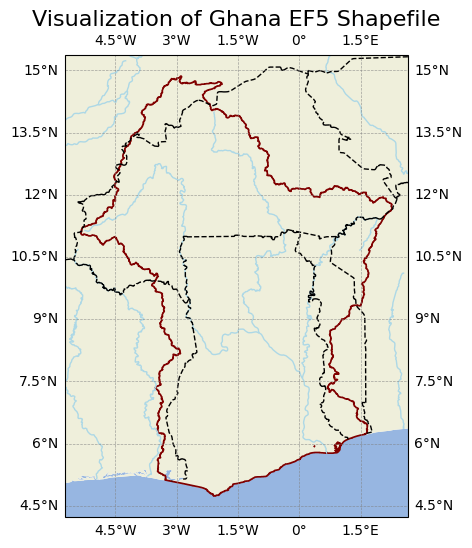

In [5]:
## Load the shapefile for ghana study region
ghana_ef5_shape = gpd.read_file(main_path+'gis/L3_basins_ghana/Ghana_SR.shp')

##Colab line
#ghana_ef5_shape = gpd.read_file(main_path+'Ghana_SR.shp')

##Visualization
# Create the figure and axis with geographic projection
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw={"projection": ccrs.PlateCarree()})
# Add country borders, land, ocean and rivers
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS, color='lightblue')
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='black')
# Add the Ghana EF5 shapefile
ghana_ef5_shape.plot(ax=ax, edgecolor='maroon', facecolor='none', linewidth=1.2)
# Style the map
ax.set_title("Visualization of Ghana EF5 Shapefile", fontsize=16)
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

plt.show()

Load the Hydrosheds files

In [6]:
path_flowacc = main_path+'gis/Hydrosheds90m/hydro_ACC_ghana.tif'
path_dem = main_path+'gis/Hydrosheds90m/hydro_DEM_ghana.tif'
path_flowdir = main_path+'gis/Hydrosheds90m/hydro_DIR_ghana.tif'

Define a function that clip a raster based on a shapefile.

In [7]:
def clip_raster(pathraster, shapefile):
    raster = rxr.open_rasterio(pathraster,
                           masked=True).squeeze()
    raster_clipped = raster.rio.clip(shapefile.geometry.apply(mapping))
    raster_clipped = raster_clipped.astype('float32')  # Set data type to float32
    array = raster_clipped.values
    array = np.where(np.isnan(array), -9999, array)  #conver nan values to -9999
    raster_output = raster_clipped.copy()
    raster_output.values = array
    raster_output.rio.write_nodata(int(-9999), inplace=True)  # Set NoData value to -9999
    raster_output.rio.write_crs("EPSG:4326", inplace=True)  # Set CRS to EPSG:4326

    return raster_output

Clip the files using the clip_raster function

In [9]:
FACC_clipped = clip_raster(path_flowacc,ghana_ef5_shape)
FACC_clipped.rio.to_raster(main_path+'FAC_ghana90m.tif')

FDIR_clipped = clip_raster(path_flowdir,ghana_ef5_shape)
FDIR_clipped.rio.to_raster(main_path+'FDIR_ghana90m.tif')

DEM_clipped = clip_raster(path_dem,ghana_ef5_shape)
DEM_clipped.rio.to_raster(main_path+'DEM_ghana90m.tif')

#If you are using Colab, please download this files for using them into EF5

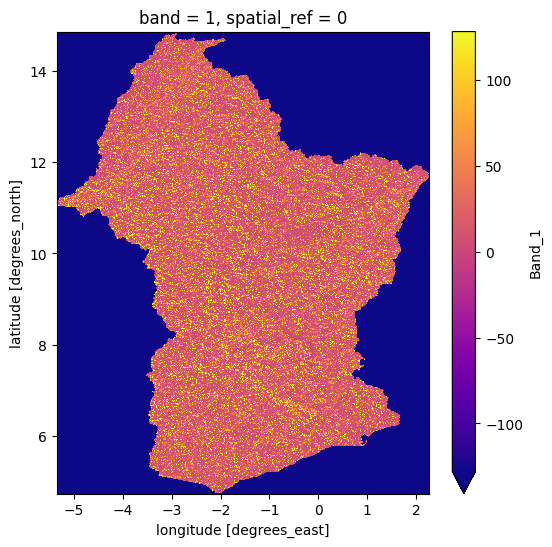

In [11]:
## Now you are done with you files.
## You can quickly visualize them using:
#DEM_clipped.plot(figsize = (6,6),vmin=-200,vmax=800, cmap='terrain')
FDIR_clipped.plot(figsize = (6,6),vmax = 128, cmap='plasma')
#FACC_clipped.plot(figsize = (6,6),cmap='Blues',vmax=250)